## Import Required Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, losses
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Importing and processing our data

In [2]:
PATH = '../data/'

train_dir = os.path.join(PATH, 'train')
test_dir = os.path.join(PATH, 'test')

train_benign_dir = os.path.join(train_dir, 'benign')
train_malignant_dir = os.path.join(train_dir, 'malignant')
test_benign_dir = os.path.join(test_dir, 'benign')
test_malignant_dir = os.path.join(test_dir, 'malignant')

In [3]:
train_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(batch_size=128,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(224, 224),
                                                           class_mode='binary')

test_data_gen = test_image_generator.flow_from_directory(batch_size=128,
                                                         directory=test_dir,
                                                         target_size=(224, 224),
                                                         class_mode='binary')

Found 2637 images belonging to 2 classes.
Found 637 images belonging to 2 classes.


In [4]:
train_data_gen.image_shape

(224, 224, 3)

### Showcase of some images

In [5]:
def plot_images(img_arr):
    fig, axes = plt.subplots(1, 5, figsize=(25, 25))
    axes = axes.flatten()
    for img, ax in zip(img_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

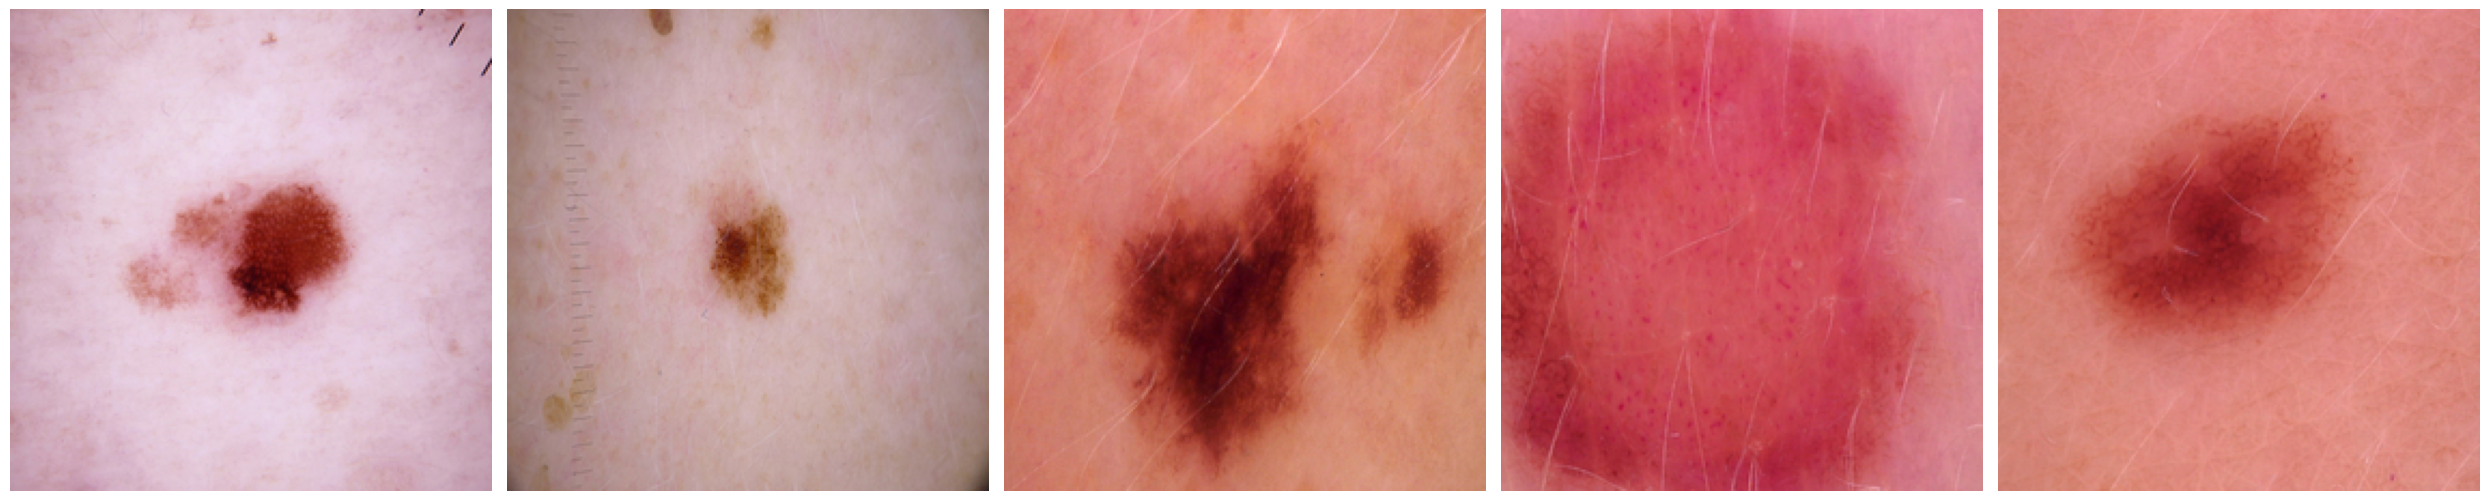

In [6]:
sample_training_images, _ = next(train_data_gen)

plot_images(sample_training_images[:5])

## Creating a Machine Learning Model with Keras

In [7]:
model = Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dropout(.2),
    layers.Dense(1, activation='sigmoid')
])

In [8]:
model.compile(optimizer='adam', loss=losses.BinaryCrossentropy(), metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [10]:
total_train_size = len(os.listdir(train_benign_dir)) + len(os.listdir(train_malignant_dir))
total_test_size = len(os.listdir(test_benign_dir)) + len(os.listdir(test_malignant_dir))

In [11]:
history = model.fit(train_data_gen,
         batch_size=128,
         epochs=5,
         steps_per_epoch=total_train_size // 128,
         validation_data=test_data_gen,
         validation_steps=total_test_size // 128)

Epoch 1/5
20/20 [==============================] - 108s 5s/step - loss: 0.7378 - accuracy: 0.6002 - val_loss: 0.5542 - val_accuracy: 0.7012
Epoch 2/5
20/20 [==============================] - 87s 4s/step - loss: 0.5588 - accuracy: 0.7011 - val_loss: 0.4712 - val_accuracy: 0.7793
Epoch 3/5
20/20 [==============================] - 88s 4s/step - loss: 0.4657 - accuracy: 0.7724 - val_loss: 0.4533 - val_accuracy: 0.7734
Epoch 4/5
20/20 [==============================] - 89s 4s/step - loss: 0.4319 - accuracy: 0.7875 - val_loss: 0.3754 - val_accuracy: 0.8242
Epoch 5/5
20/20 [==============================] - 87s 4s/step - loss: 0.4137 - accuracy: 0.7935 - val_loss: 0.4354 - val_accuracy: 0.7910


## Results

In [12]:
history.history

{'loss': [0.7377883195877075,
  0.55882728099823,
  0.46574509143829346,
  0.43186140060424805,
  0.41371044516563416],
 'accuracy': [0.6002391576766968,
  0.7010761499404907,
  0.772419273853302,
  0.7875000238418579,
  0.7935432195663452],
 'val_loss': [0.5542184114456177,
  0.4711591303348541,
  0.4533090591430664,
  0.37541621923446655,
  0.43543457984924316],
 'val_accuracy': [0.701171875,
  0.779296875,
  0.7734375,
  0.82421875,
  0.791015625]}

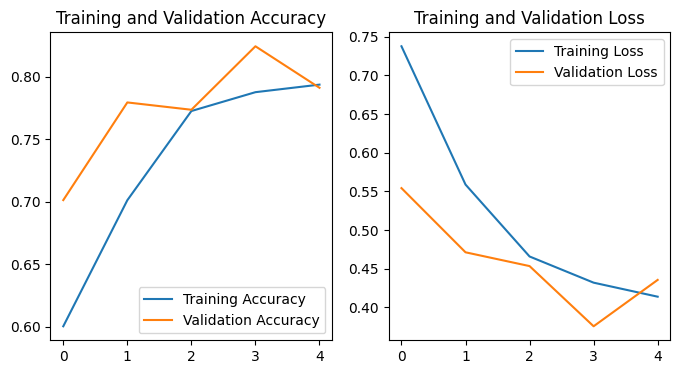

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()